In [36]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [37]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [38]:
train.shape, test.shape

((1460, 81), (1459, 80))

### Outliers, Leverag & Influential Points

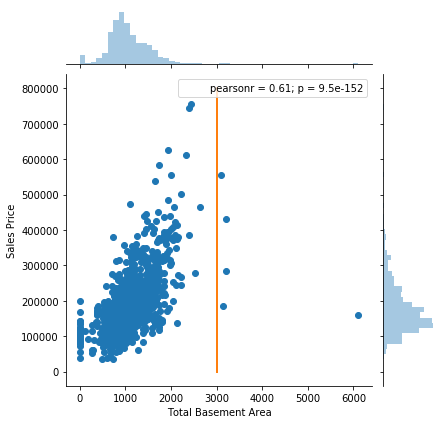

In [39]:
s1 = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train)
s1.ax_joint.plot([3000, 3000], [0, 800000], linewidth=2)
s1.set_axis_labels(xlabel="Total Basement Area", ylabel="Sales Price")
plt.show()

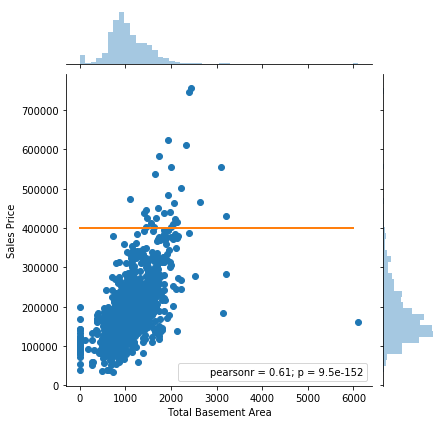

In [40]:
s1 = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train)
s1.ax_joint.plot([0, 6000], [400000, 400000], linewidth=2)
s1.set_axis_labels(xlabel="Total Basement Area", ylabel="Sales Price")
plt.show()

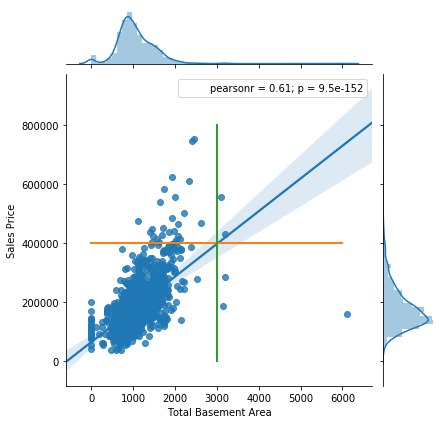

In [41]:
s1 = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train, kind = "reg")
s1.ax_joint.plot([0, 6000], [400000, 400000], linewidth=2)
s1.ax_joint.plot([3000, 3000], [0, 800000], linewidth=2)
s1.set_axis_labels(xlabel="Total Basement Area", ylabel="Sales Price")
plt.show()

### Outliers Detection

/Users/alvira/anaconda2/envs/fastai/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


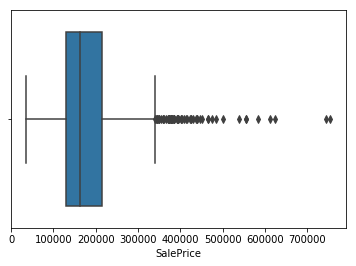

In [42]:
s1 = sns.boxplot(train['SalePrice'], showfliers=True, )
plt.show()

In [57]:
q1 = np.percentile(train["SalePrice"],25)
q3 = np.percentile(train["SalePrice"],75)
iqr = q3-q1
iqr

84025.0

In [58]:
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(3937.5, 340037.5)

In [61]:
train[(train["SalePrice"]>upper) | (train["SalePrice"]<lower)].shape[0]

61

In [62]:
train.shape[0]

1460

** There are 61 observations according to Interquartile range that are outliers**

In [63]:
z = (train["SalePrice"] - np.mean(train["SalePrice"]))/np.std(train["SalePrice"])
(np.absolute(z)>2.5).sum()

** There are 40 observations which are outliers according to Z-Score**